<a href="https://colab.research.google.com/github/NHoangThanh/AI-assignment/blob/main/Fuzzy(tt).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=0929e4b2fb219f673847d003fda2ea6053033a11a61f87a8e54364e182982996
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


<ipython-input-88-7816f7fbe4ec>:48: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'z', offset = 7, cmap = 'viridis', anpha = 0.5)
<ipython-input-88-7816f7fbe4ec>:49: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-88-7816f7fbe4ec>:50: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)


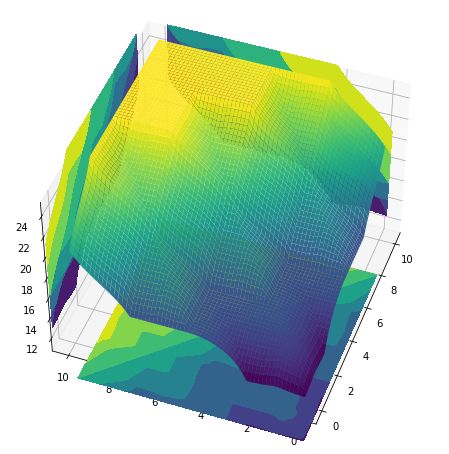

In [ ]:
# Food, Service, Tip
import numpy as np
import skfuzzy as fuzzy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skfuzzy import control as ctrl 
universe = np.linspace(0,10,61)
universe1 = np.linspace(10,30,61)
food = ctrl.Antecedent(universe,'Food')
service = ctrl.Antecedent(universe,'Service')
tip = ctrl.Consequent(universe1,'Tip')
names = ['VP','P','AV','G','VG']
namesTip = ['L','N','M']
food.automf(names = names)
service.automf(names = names)
tip.automf(names = names)

rule0= ctrl.Rule(antecedent = ((food['VP'] & service['VP'])|(food['P'] & service['VP'])
|(food['VP'] & service['P'])), consequent= tip['VP'], label = 'ruleVP')

rule1 = ctrl.Rule(antecedent=((food['VP'] & service['AV'])|(food['VP'] & service['G'])
|(food['P'] & service['P'])|(food['P'] & service['AV'])|(food['AV'] & service['VP'])
|(food['AV'] & service['P'])|(food['G'] & service['VP'])), consequent = tip['P'], label = 'ruleP')

rule2 = ctrl.Rule(antecedent = ((food['VP']&service['VG'])|(food['P']&service['G'])
|(food['AV']&service['AV'])|(food['G']&service['P'])|(food['VG']&service['VP'])), consequent = tip['AV'], label = 'ruleAV')

rule3 = ctrl.Rule(antecedent = ((food['P']&service['VG'])|(food['AV']&service['G'])
|(food['AV']&service['VG'])|(food['G']&service['AV'])|(food['G']&service['G'])|(food['VG']&service['P'])
|(food['VG']&service['AV'])), consequent = tip['G'], label = 'ruleG')

rule4 =ctrl.Rule(antecedent = ((food['G']&service['VG'])|(food['VG']&service['G'])
|(food['VG']&service['VG'])), consequent = tip['G'], label = 'ruleG')

system = ctrl.ControlSystem([rule0,rule1,rule2,rule3,rule4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 61*61+1)
upsampled = np.linspace(0,10,61)
x,y= np.meshgrid(upsampled,upsampled)
z = np.zeros_like(x)
for i in range(61):
  for j in range(61):
    sim.input['Food'] = x[i,j]
    sim.input['Service'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['Tip']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis',linewidth = 0.4, antialiased = True)
cset = ax.contourf(x,y,z, zdir = 'z', offset = 7, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(45,200)


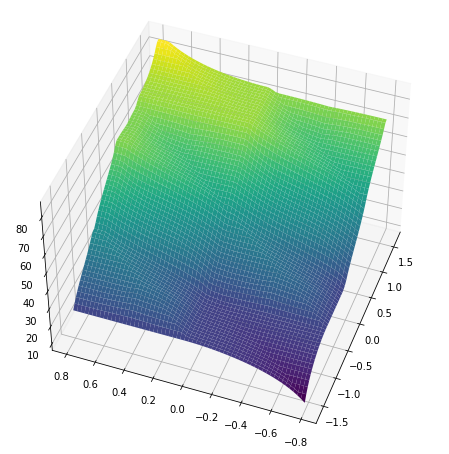

In [ ]:
#Con lắc ngược, alpha, d(alpha)/dt, force
import numpy as np
import math
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skfuzzy import control as ctrl 

a = ctrl.Antecedent(np.arange(-np.pi/2,np.pi/2,0.1), 'a')
da = ctrl.Antecedent(np.arange(-np.pi/4,np.pi/4,0.1), 'da')
force = ctrl.Consequent(np.arange(-100,100,1), 'force')
# tao ham cho tung member
a['LN'] = fuzz.trimf(a.universe, [-np.pi/2,-np.pi/2,-np.pi/4])
a['N'] = fuzz.trimf(a.universe, [-np.pi/2,-np.pi/4,0])
a['ZE'] = fuzz.trimf(a.universe, [-np.pi/4,0,np.pi/4])
a['P'] = fuzz.trimf(a.universe, [0,np.pi/4,np.pi/2])
a['LP'] = fuzz.trimf(a.universe, [np.pi/4, np.pi/2, np.pi/2])

da['LN'] = fuzz.trimf(da.universe, [-np.pi/2,-np.pi/2,-np.pi/4])
da['N'] = fuzz.trimf(da.universe, [-np.pi/2,-np.pi/4,0])
da['ZE'] = fuzz.trimf(da.universe, [-np.pi/4,0,np.pi/4])
da['P'] = fuzz.trimf(da.universe, [0,np.pi/4,np.pi/2])
da['LP'] = fuzz.trimf(da.universe, [np.pi/4, np.pi/2, np.pi/2])

force['LN'] = fuzz.trimf(force.universe, [0,0,25])
force['N'] = fuzz.trimf(force.universe, [0,25,50])
force['ZE'] = fuzz.trimf(force.universe, [25,50,75])
force['P'] = fuzz.trimf(force.universe, [50,75,100])
force['LP'] = fuzz.trimf(force.universe, [75, 100, 100])


rule0 = ctrl.Rule(antecedent = ((a['LN']&da['LN'])|(a['LN']&da['N'])|(a['N']&da['LN'])), consequent = force['LN'], label = 'forceLN')
rule1 = ctrl.Rule(antecedent = ((a['LN']&da['ZE'])|(a['LN']&da['P'])|(a['N']&da['N'])|(a['N']&da['ZE'])|(a['ZE']&da['LN'])|(a['ZE']&da['N'])|(a['P']&da['LN'])), consequent = force['N'], label = 'forceN')
rule2 = ctrl.Rule(antecedent = ((a['LP']&da['LN'])|(a['P']&da['N'])|(a['ZE']&da['ZE'])|(a['N']&da['P'])|(a['LN']&da['LP'])), consequent = force['ZE'], label = 'forceZE')
rule3 = ctrl.Rule(antecedent = ((a['N']&da['LP'])|(a['ZE']&da['P'])|(a['ZE']&da['LP'])|(a['P']&da['ZE'])|(a['P']&da['P'])|(a['LP']&da['N'])|(a['LP']&da['ZE'])), consequent = force['P'], label = 'forceP')
rule4 = ctrl.Rule(antecedent = ((a['P']&da['LP'])|(a['LP']&da['P'])|(a['LP']&da['LP'])), consequent = force['LP'], label = 'forceLP')
system = ctrl.ControlSystem([rule0,rule1,rule2,rule3,rule4])

sim = ctrl.ControlSystemSimulation(system, flush_after_run = 61*61+1)
upsampled = np.linspace(-np.pi/2,np.pi/2,61)
upsampled1 = np.linspace(-np.pi/4,np.pi/4,61)
x,y= np.meshgrid(upsampled, upsampled1)

z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    sim.input['a'] = x[i,j]
    sim.input['da'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['force']


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis',linewidth = 0.4, antialiased = True)

ax.view_init(45,200)

In [4]:
import numpy as np
import skfuzzy as fuzzy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skfuzzy import control as ctrl 
universe = np.linspace(0,200,201)
universe1 = np.linspace(-24,24,101)
#sensor
left = ctrl.Antecedent(universe,'left')
right = ctrl.Antecedent(universe, 'right')
center = ctrl.Antecedent(universe, 'center')
#motor
motor1 = ctrl.Consequent(universe1, 'motor1')
motor2 = ctrl.Consequent(universe1, 'motor2')

names = ['VN','N','AV','F','VF']
names1 = ['-H','-N','-L','L', 'N', 'H']

left.automf(names = names)
right.automf(names = names)
center.automf(names = names)
motor1.automf(names = names1)
motor2.automf(names = names1)

rule0 = ctrl.Rule(antecedent = ((center['AV'] & left['N'] & right['N'])
| (center['AV'] & left['VN'] & right['VN'])), consequent = motor1['L'], 
label = 'motorLowCW')
rule2 = ctrl.Rule(antecedent = ((center['F'] & left['AV'] & right['AV'])
| (center['N'] & left['VN'] & right['F'])
| (center['N'] & left['N'] & right['F'])), consequent = motor1['N'], 
label = 'motorNormalCW')



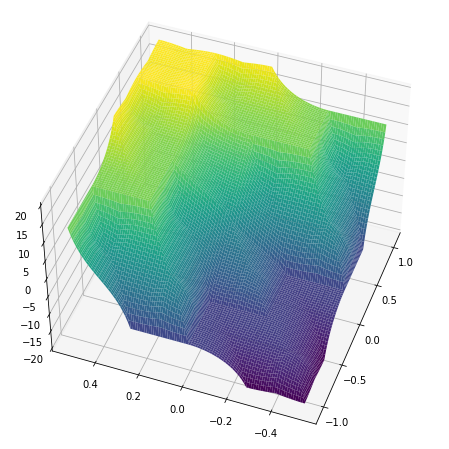

In [17]:
#StepMotor, error, d(error)/dt, voltage
import numpy as np
import skfuzzy as fuzzy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skfuzzy import control as ctrl 
universe = np.linspace(-np.pi/3,np.pi/3,101)
universe1 = np.linspace(-np.pi/6,np.pi/6,101)
universe2 = np.linspace(-24,24,101)
# error and d(error)/dt
e = ctrl.Antecedent(universe,'Error')
de = ctrl.Antecedent(universe1, 'dError')
# voltage
v = ctrl.Consequent(universe2, 'Voltage')

names = ['VN','N','ZE','P','VP']
names1 = ['-H','-N','ZE', 'N', 'H']

e.automf(names = names)
de.automf(names = names)
v.automf(names = names1)

rule0 = ctrl.Rule(antecedent = ((e['VN']&de['VN'])
|(e['VN']&de['N'])|(e['N']&de['VN'])), consequent = v['-H'], label = '-H')

rule1 = ctrl.Rule(antecedent=((e['VN']&de['ZE'])|(e['VN']&de['P'])
|(e['N']&de['N'])|(e['N']&de['ZE'])|(e['ZE']&de['VN'])|(e['ZE']&de['N'])
|(e['P']&de['VN'])), consequent = v['-N'], label = '-N')

rule2 = ctrl.Rule(antecedent=(e['ZE']&de['ZE']), consequent= v['ZE'],
label = 'ZE')

rule3 = ctrl.Rule(antecedent=((e['VN']&de['VP'])|(e['N']&de['P'])
|(e['N']&de['VP'])|(e['ZE']&de['P'])|(e['P']&de['N'])|(e['P']&de['ZE'])
|(e['VP']&de['VN'])|(e['VP']&de['N'])), consequent = v['N'],
label = 'N')

rule4 = ctrl.Rule(antecedent = ((e['ZE']&de['VP'])|(e['P']&de['P'])
|(e['P']&de['VP'])|(e['VP']&de['ZE'])|(e['VP']&de['P'])
|(e['VP']&de['VP'])), consequent = v['H'], label = 'H')

system = ctrl.ControlSystem([rule0,rule1,rule2,rule3,rule4])

sim = ctrl.ControlSystemSimulation(system, flush_after_run = 101*101+1)
upsampled = np.linspace(-np.pi/3,np.pi/3,101)
upsampled1 = np.linspace(-np.pi/6,np.pi/6,101)
x,y= np.meshgrid(upsampled, upsampled1)

z = np.zeros_like(x)

for i in range(101):
  for j in range(101):
    sim.input['Error'] = x[i,j]
    sim.input['dError'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['Voltage']


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis',
linewidth = 0.4, antialiased = True)

ax.view_init(45,200)